# Part 5.2 !! Pandas DataFrame to PostgreSQL using Python
<h3>Extract, Transform, and Load PostgreSQL Data in Python</h3>

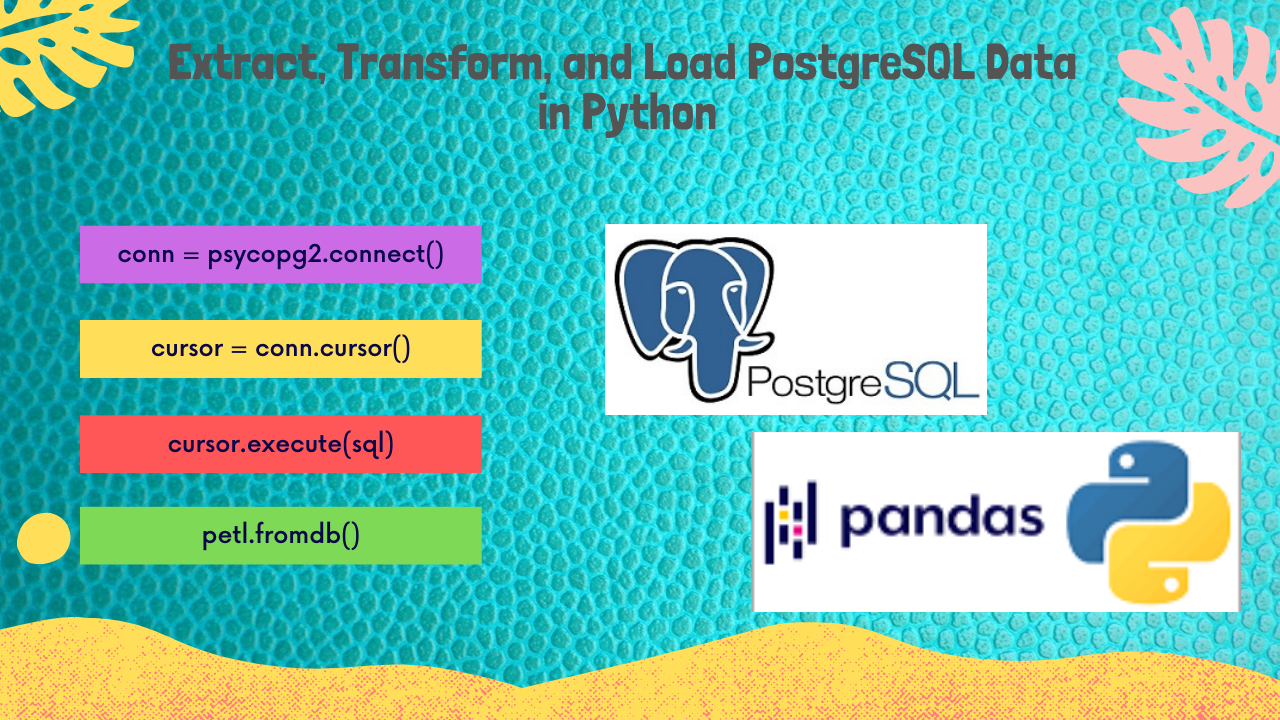

<h3>Prerequisites</h3>

<h4>(a) Python 3.8.3 </h4>

[Anaconda download link](https://www.anaconda.com/products/individual)

<h4>(b) PostgreSQL 13</h4>

[Download link](https://www.postgresql.org/download/)

<b>(c) Psycopg2 : </b> To install <b>Psycopg2</b> use the command: <b>pip install psycopg2</b>

<h3>Objective</h3>

Generally we create training and testing data by importing csv file into pandas DataFrame but when we have large data stored in database server then we need a method to extract it into pandas DataFrame directly from database server. For this objective, we will learn step by step working code for different methods for doing it.

<h3>Step 1 : Import libraries</h3>

In [4]:
# import sys to get more detailed Python exception info
import sys
# import the connect library for psycopg2
import psycopg2
# import the error handling libraries for psycopg2
from psycopg2 import OperationalError, errorcodes, errors
import psycopg2.extras as extras
from sqlalchemy import create_engine
import pandas as pd

In [11]:
# Extract Trabsforl & Load
import petl as etl

<h3>Step 2: Specify the connection parameters</h3>

In [5]:
# Note: please change your database, username & password as per your own values

conn_params_dic = {
    "host"      : "localhost",
    "database"  : "irisdb",
    "user"      : "postgres",
    "password"  : "Passw0rd"
}

<h3> Step 3 : Support Functions </h3>

In [6]:
# Define a function that handles and parses psycopg2 exceptions
def show_psycopg2_exception(err):
    # get details about the exception
    err_type, err_obj, traceback = sys.exc_info()    
    # get the line number when exception occured
    line_n = traceback.tb_lineno    
    # print the connect() error
    print ("\npsycopg2 ERROR:", err, "on line number:", line_n)
    print ("psycopg2 traceback:", traceback, "-- type:", err_type) 
    # psycopg2 extensions.Diagnostics object attribute
    print ("\nextensions.Diagnostics:", err.diag)    
    # print the pgcode and pgerror exceptions
    print ("pgerror:", err.pgerror)
    print ("pgcode:", err.pgcode, "\n")
    
# Define a connect function for PostgreSQL database server
def connect(conn_params_dic):
    conn = None
    try:
        print('Connecting to the PostgreSQL...........')
        conn = psycopg2.connect(**conn_params_dic)
        print("Connection successful..................")
        
    except OperationalError as err:
        # passing exception to function
        show_psycopg2_exception(err)        
        # set the connection to 'None' in case of error
        conn = None
    return conn

### Step 4:  Loading PostgreSQL Data into a CSV File : Extract, Transform, and Load the PostgreSQL Data

We can use petl to extract, transform, and load the PostgreSQL data. In this example, we extract PostgreSQL data, sort the data by the species column, and load the data into a CSV file.

In [10]:
# Connecting to PostgreSQL Data
conn = connect(conn_params_dic)

Connecting to the PostgreSQL...........
Connection successful..................


### Extract from PostgreSQL Database

In [33]:
# Create a SQL Statement to Query PostgreSQL
#sql = "SELECT * FROM iris WHERE species = 'testing'"
sql = "SELECT * FROM iris "

extractData = etl.fromdb(conn,sql)
 
extractData.head()

sepal_length,sepal_width,petal_length,petal_width,species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa


### Transform

Here, you can perform different opations with data after loading. For example, you can do the following
1. join tables, 
2. sorting, 
3. fill missing values 
4. Reshaping tables etc.

In [34]:
transformData = etl.sort(extractData,'species')

### Load (Write data)

After all operatons with data, now can save your data in you disk for reporting or later use.

In [35]:
etl.tocsv(transformData,'../Learn Python Data Access/iris_v1.csv')

<b>Conclusion : </b> This ends our Part 5.2. In this tutorial we have learned how to extract, transform and load data.

<b>Stay Positive !! Stay Safe !! Keep Learning :):)

<h3>Thanks you for reading!!</h3>